In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab

# Statistical calculation
from scipy.stats import norm

# Data fetching
import fix_yahoo_finance as yf

# Tabular data point
from tabulate import tabulate

In [2]:
# import data
df = yf.download('GE', '2012-01-01', '2018-01-31')

[*********************100%***********************]  1 of 1 downloaded


In [3]:
print(df.head())

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2012-01-03  17.528847  17.788462  17.528847  17.653847  13.679369  61054900
2012-01-04  17.605770  17.884615  17.576923  17.846153  13.828383  44464900
2012-01-05  17.750000  17.884615  17.586538  17.836538  13.820932  47652000
2012-01-06  18.009615  18.067308  17.846153  17.932692  13.895441  53112200
2012-01-09  18.019230  18.153847  17.846153  18.134615  14.051897  48866900


In [4]:
df = df[['Close']]
print(df.head())

                Close
Date                 
2012-01-03  17.653847
2012-01-04  17.846153
2012-01-05  17.836538
2012-01-06  17.932692
2012-01-09  18.134615


In [5]:
df['returns'] = df.Close.pct_change()
print(df['returns'].head())

Date
2012-01-03         NaN
2012-01-04    0.010893
2012-01-05   -0.000539
2012-01-06    0.005391
2012-01-09    0.011260
Name: returns, dtype: float64


In [6]:
mean = np.mean(df['returns'])
print(mean)

-2.1357614467301347e-05


In [7]:
std_dev = np.std(df['returns'])
print(std_dev)

0.011900618918560861


c:\users\nahor\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  This is separate from the ipykernel package so we can avoid doing imports until


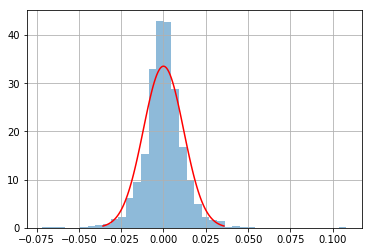

In [8]:
df['returns'].hist(bins=40, density=True, histtype='stepfilled', alpha=0.5)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x, mlab.normpdf(x, mean, std_dev), "r")
plt.show()

In [9]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0152726
95%                      -0.0195961
99%                      -0.0277063
